<a href="https://colab.research.google.com/github/shubham19nijwala/Bike_Sharing_Demand_Prediction-Regression/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  *Bike Sharing Demand Prediction*

---



---





### **Project Type**    - *Regression*
### **Contribution**    - *Individual*- *Shubham Singh Nijwala*


# **Project Summary -**

The emergence of bike and scooter ride-sharing companies in urban areas, has created a challenge in accurately predicting the demand for their services. Overestimating or underestimating the demand can lead to resource wastage or revenue loss, respectively. To address this challenge, a project aims to combine historical bike usage patterns with weather data to forecast bike rental demand.

The project utilizes a dataset with eight input variables: 'Date', 'Seasons', 'Holiday', 'Functional day', 'Temperature', 'Humidity', 'Dew Point Temperature', and 'Windspeed'. Python libraries such as Pandas, Seaborn, NumPy, and scikit-learn (sklearn) are used to develop the prediction algorithm. By evaluating different models, the project seeks to identify algorithms that provide accurate predictions and can be deployed effectively in real-world scenarios.

Accurate bike rental demand forecasting offers significant benefits. Ride-sharing companies can reduce waste and improve resource allocation, resulting in cost savings and increased profitability. By optimizing bike maintenance, parking space allocation, and operational planning based on anticipated demand, these companies can operate more efficiently.

Moreover, accurate demand predictions enhance customer satisfaction and provide a better overall experience for users. By ensuring an adequate supply of bikes and scooters based on anticipated demand, customers are less likely to face unavailability issues. This fosters customer loyalty, positive word-of-mouth, and sustained business growth.

Additionally, bike and scooter ride-sharing services are considered environmentally friendly alternatives to traditional transportation methods. By incorporating weather data into demand forecasting, it becomes possible to align the supply of bikes and scooters with weather conditions suitable for cycling. This encourages more people to choose biking as a means of transportation, resulting in reduced traffic congestion and lower carbon emissions. Accurate demand forecasting contributes to the broader goal of promoting sustainable and eco-friendly urban mobility.

In conclusion, the project's aim to combine historical bike usage patterns with weather data for accurate demand forecasting holds significant potential for the bike and scooter ride-sharing industry. By utilizing advanced algorithms and machine learning techniques, the project seeks to optimize resource allocation, reduce waste, and increase profitability for ride-sharing companies. Simultaneously, it strives to enhance customer satisfaction, promote environmentally friendly transportation alternatives, and mitigate traffic congestion and carbon emissions. Data-driven insights can have a positive impact on both the business and environmental aspects of the bike and scooter ride-sharing industry, leading to a more sustainable and efficient urban mobility landscape.






# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

#**Data Description**
* **Date** - day/month/year
* **Rented Bike count** - Count of bikes rented per hour
* **Hour** - Hour of the day
* **Temperature**-Temperature in Celsius
* **Humidity** - Humidity in the air in %
* **Windspeed** - Speed of the wind in  m/s
* **Visibility** - Visibility in m (10m)
* **Dew point temperature** - Temperature at the beggining of the day(Celsius)
* **Solar radiation** -Sun contribution (MJ/m2)
* **Rainfall** - Amount of raining in mm
* **Snowfall** - Amount of snowing in cm
* **Seasons** - Winter, Spring, Summer, Autumn
* **Holiday** - Holiday/No holiday
* **Functional Day** -  If the day is a Functioning Day or not

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [63]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score,log_loss

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [64]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
bike_df=pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand Prediction/SeoulBikeData.csv',encoding='latin')

### Dataset First View

In [66]:
# Dataset First Look
bike_df.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3000,05/04/2018,436,0,9.5,61,1.7,2000,2.3,0.00,0.0,0.0,Spring,No Holiday,Yes
1276,23/01/2018,45,4,-9.5,49,4.3,2000,-18.2,0.00,0.0,1.0,Winter,No Holiday,Yes
5603,22/07/2018,499,11,33.8,45,1.9,1928,20.2,2.74,0.0,0.0,Summer,No Holiday,Yes
4010,17/05/2018,78,2,21.8,97,1.3,175,21.2,0.00,1.0,0.0,Spring,No Holiday,Yes
6431,25/08/2018,1357,23,22.9,78,1.4,2000,18.8,0.00,0.0,0.0,Summer,No Holiday,Yes


### Dataset Rows & Columns count

In [67]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)

### Dataset Information

In [68]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [69]:
# Dataset Duplicate Value Count
bike_df.duplicated().sum()

0

#### Missing Values/Null Values

In [70]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

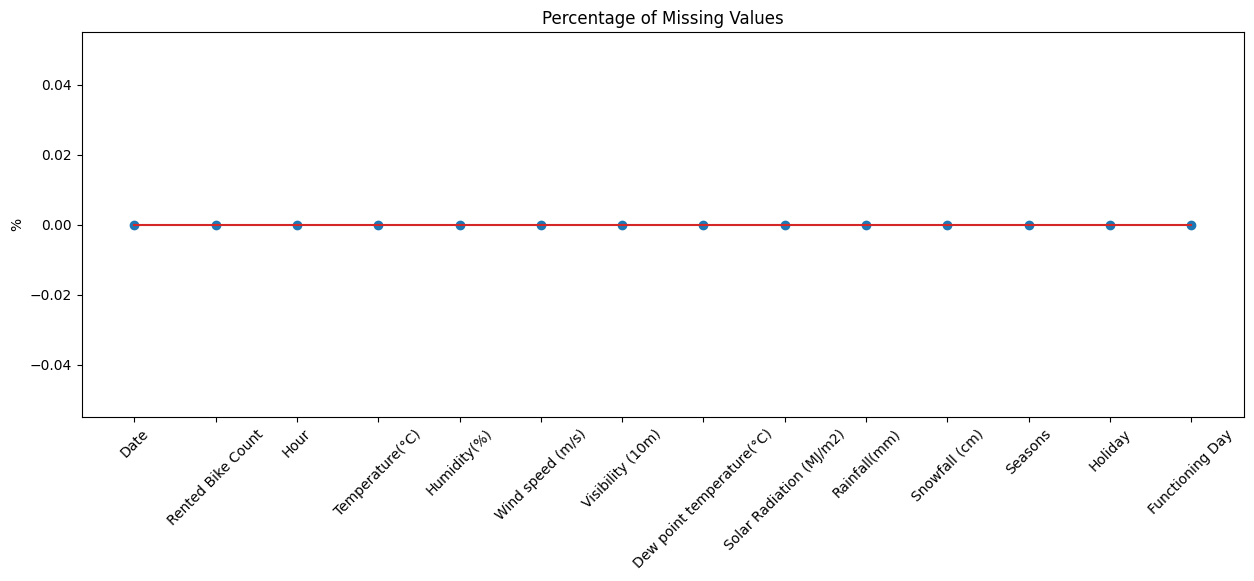

In [71]:
# Visualizing the missing values
missing_values_per = pd.DataFrame((bike_df.isnull().sum()/len(bike_df))*100).reset_index()
plt.figure(figsize=(15,5))
plt.stem(missing_values_per['index'],missing_values_per[0])
plt.xticks(rotation=45,fontsize=10)
plt.title('Percentage of Missing Values')
plt.ylabel('%')
plt.show()



### What did you know about your dataset?

***There are no missing values and duplicates present in our Dataset.Our data contains 8760 rows and 14 columns.***

## ***2. Understanding Your Variables***

In [72]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [73]:
# Renaming Columns
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [74]:
# Dataset Describe
bike_df.describe(include='all')

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Check Unique Values for each variable.

In [75]:
# Check Unique Values for each variable.
for var in bike_df.columns:
  print(var,' : ', bike_df[var].unique())
  print('--'*70)

Date  :  ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13/02/2018'
 

In [76]:
# Number of Unique values in each columns
bike_df.nunique()

Date                      365
Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
dtype: int64

## 3. ***Data Wrangling***

In [77]:
# convert data type of 'Date' column to Datetime format
bike_df['Date'].dtype

dtype('O')

In [78]:
bike_df['Date']=bike_df['Date'].apply(lambda x: datetime.strptime(x,'%d/%m/%Y'))

In [79]:
bike_df['Date'].dtype

dtype('<M8[ns]')

In [80]:
# Extracting: 'day' , 'month' and  'year'  from 'Date' column:
bike_df['day']=bike_df['Date'].dt.day_name()
bike_df['month']=bike_df['Date'].dt.month
bike_df['year']=bike_df['Date'].dt.year

In [81]:
bike_df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,day,month,year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017


In [82]:
# Creating new column named: 'weekend'
bike_df['weekend']=bike_df['day'].apply(lambda x: 1 if x== 'Saturday' or x== 'Sunday' else 0)

In [83]:
bike_df['weekend'].value_counts()

0    6264
1    2496
Name: weekend, dtype: int64

In [84]:
# Drop columns: 'Date', 'day' and 'year'
bike_df.drop([ 'Date','day','year'],axis=1,inplace=True)


In [85]:
bike_df.sample(3)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekend
1240,396,16,4.7,17,2.1,2000,-18.3,0.55,0.0,0.0,Winter,No Holiday,Yes,1,1
5045,133,5,22.1,97,0.5,152,21.5,0.00,1.5,0.0,Summer,No Holiday,Yes,6,0
6582,362,6,20.9,87,0.7,1198,18.6,0.00,0.0,0.0,Autumn,No Holiday,Yes,9,1


###***The "Date" column, initially read as a string by Python, is essential for analyzing user behavior. To enable precise analysis, it is necessary to convert the column into a datetime format. Once converted, it can be separated into three separate columns: "year," "month," and "day." These columns represent distinct temporal components and allow for more efficient categorization and analysis of the data, providing valuable insights into user behavior patterns.***

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## ***UNIVARIATE ANALYSIS***

#### Chart - 1

In [86]:
bike_df['Rented_Bike_Count'].value_counts().sort_values(ascending=False)

0       295
223      19
262      19
122      19
165      18
       ... 
2443      1
3146      1
1699      1
2003      1
595       1
Name: Rented_Bike_Count, Length: 2166, dtype: int64

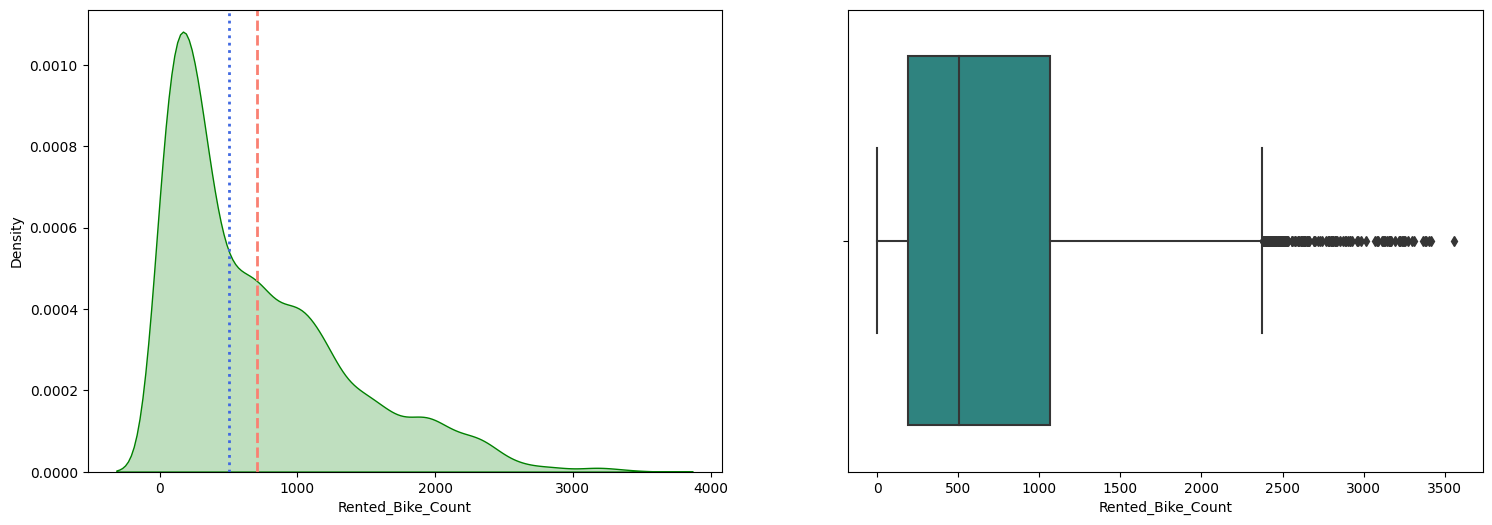

In [87]:
# Chart - 1 : Distribution of Dependent variable

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
sns.kdeplot(bike_df,x='Rented_Bike_Count',fill=True,color='g',ax=ax1)
ax1.axvline(bike_df['Rented_Bike_Count'].mean(), color='salmon', linestyle='dashed', linewidth=2)
ax1.axvline(bike_df['Rented_Bike_Count'].median(), color='royalblue', linestyle=':', linewidth=2)  
sns.boxplot(bike_df,x='Rented_Bike_Count',ax=ax2,palette="viridis")
plt.show()

#####  What is/are the insight(s) found from the chart?

###**The dependent variable is positively skewed and have lot more outliers**

#####  Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####**The gained insights from analyzing data with a positively skewed dependent variable (Bike rented count) and a high number of outliers can potentially create a positive business impact. However, the presence of outliers suggests instances where there are extremely high bike rental counts, which may indicate exceptional demand spikes or anomalies. While this may not directly lead to negative growth, it can pose challenges in capacity planning, resource allocation, and service delivery, requiring businesses to carefully manage and optimize operations to meet customer demand and prevent potential negative impacts on customer satisfaction and business growth.**

#### Chart - 2

In [88]:
num_features=bike_df.drop('Rented_Bike_Count',axis=1).describe().columns
num_features

Index(['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'month', 'weekend'],
      dtype='object')

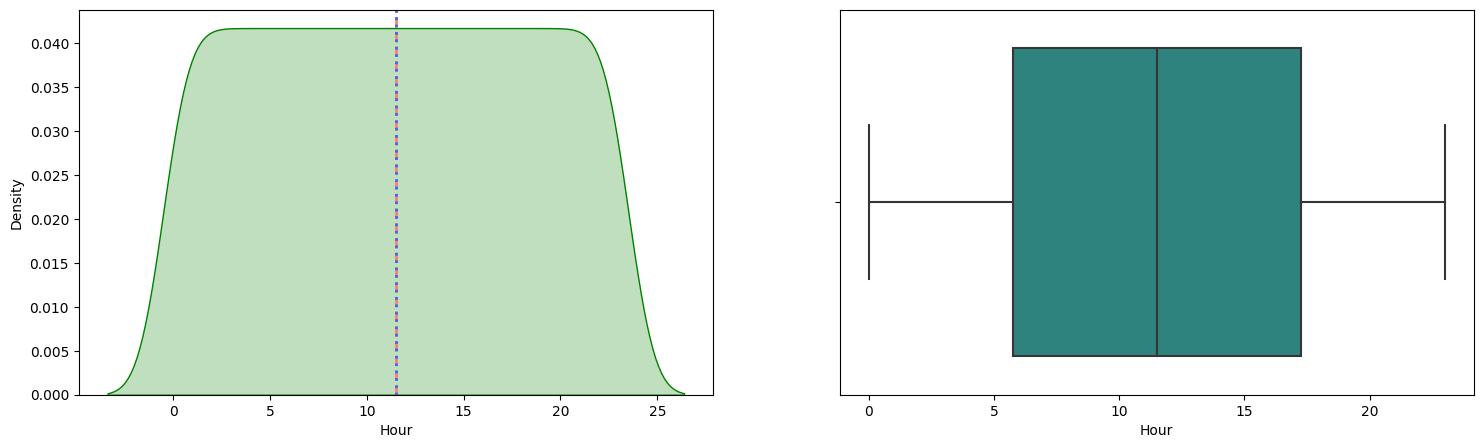

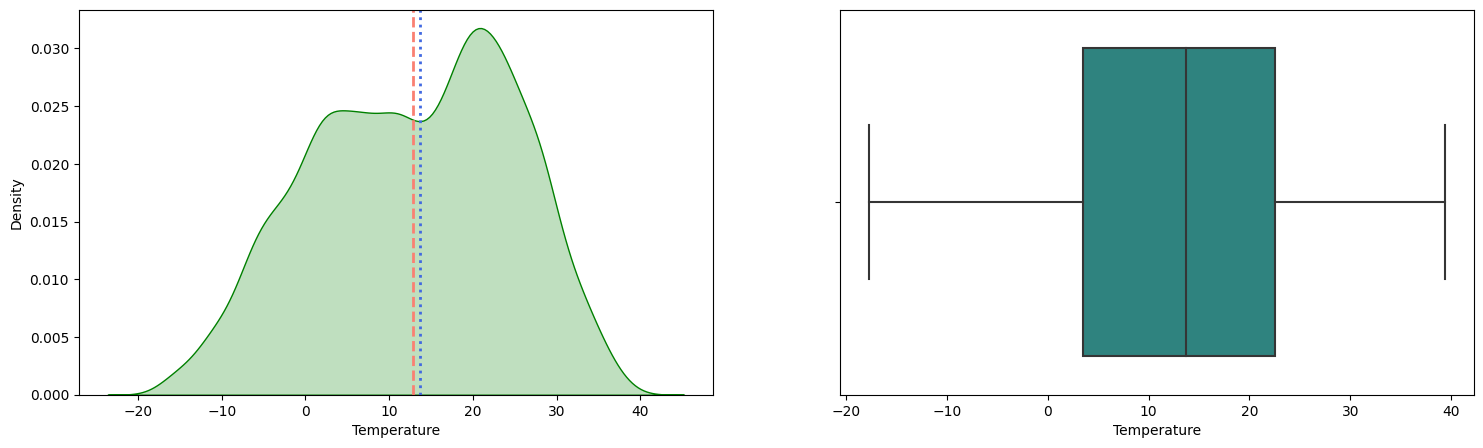

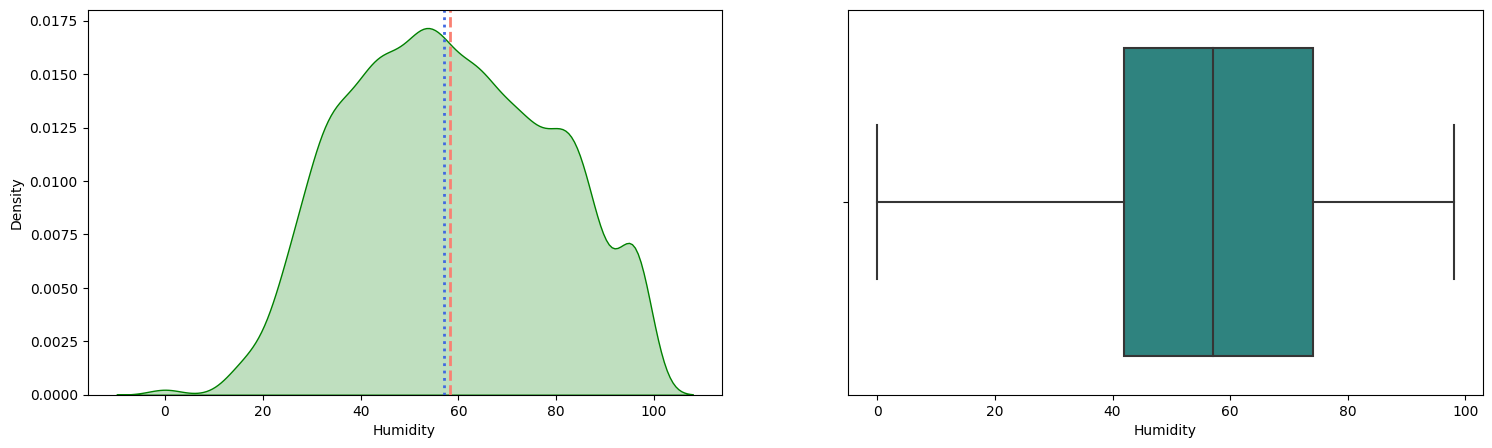

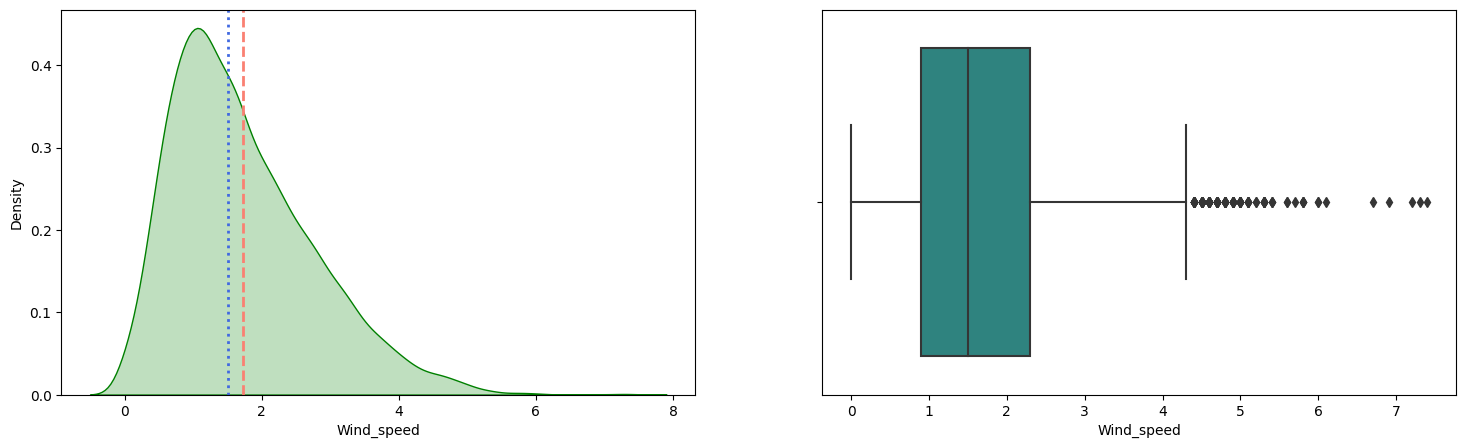

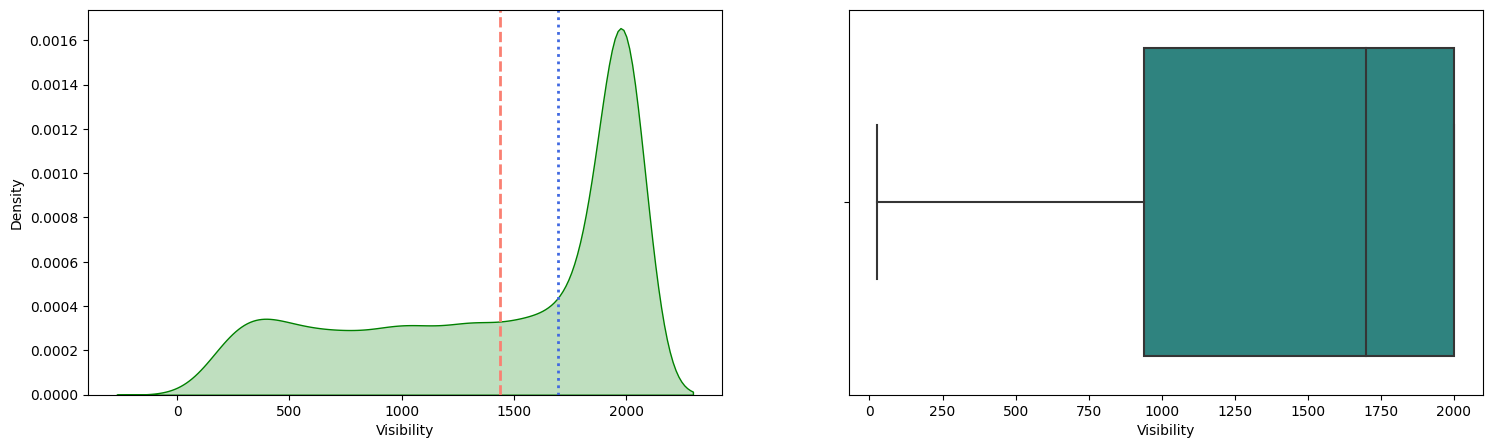

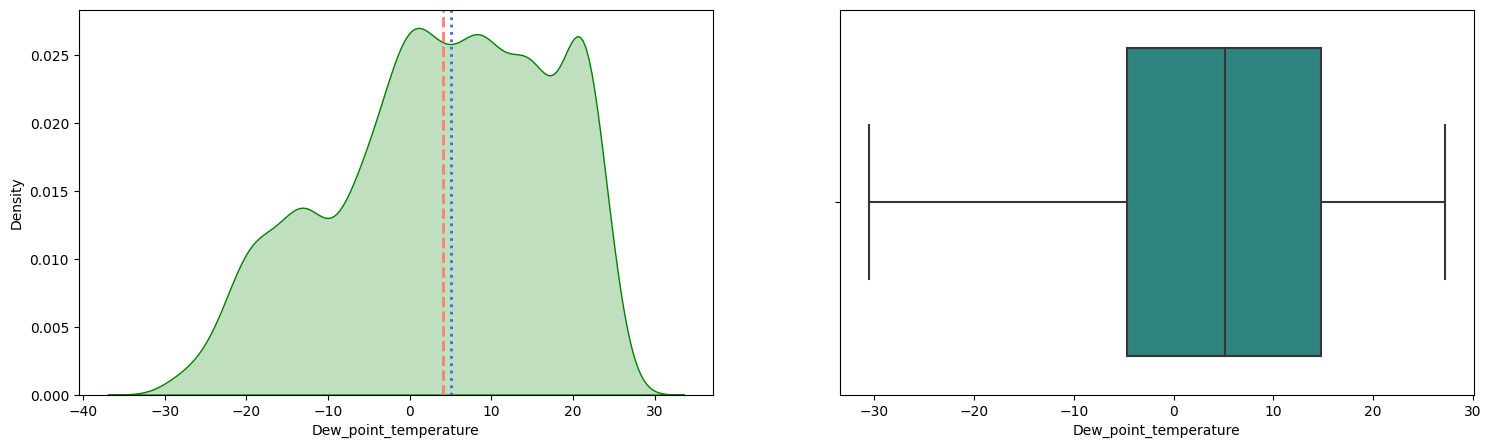

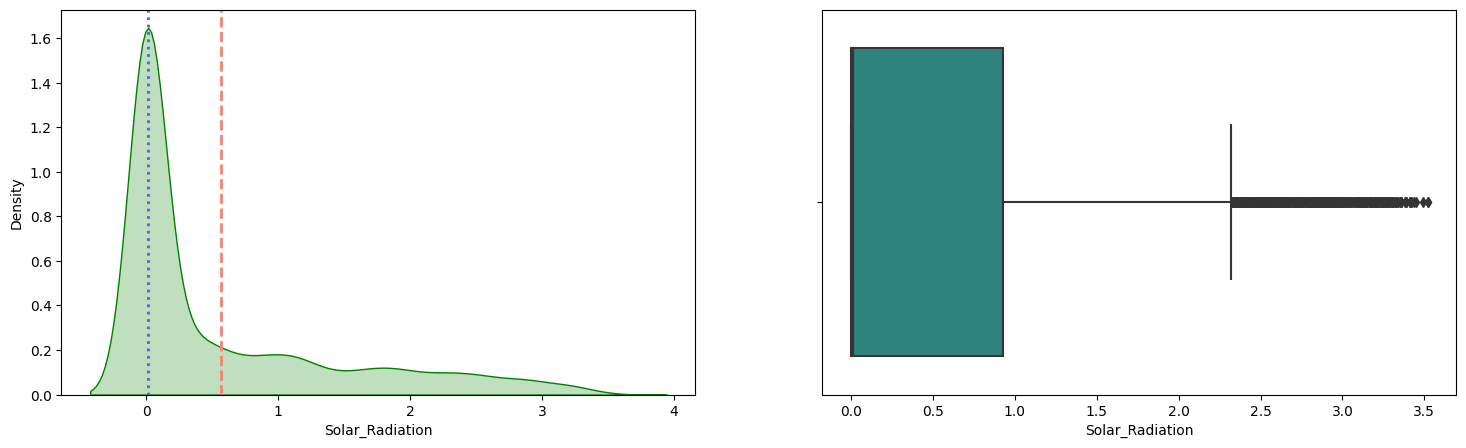

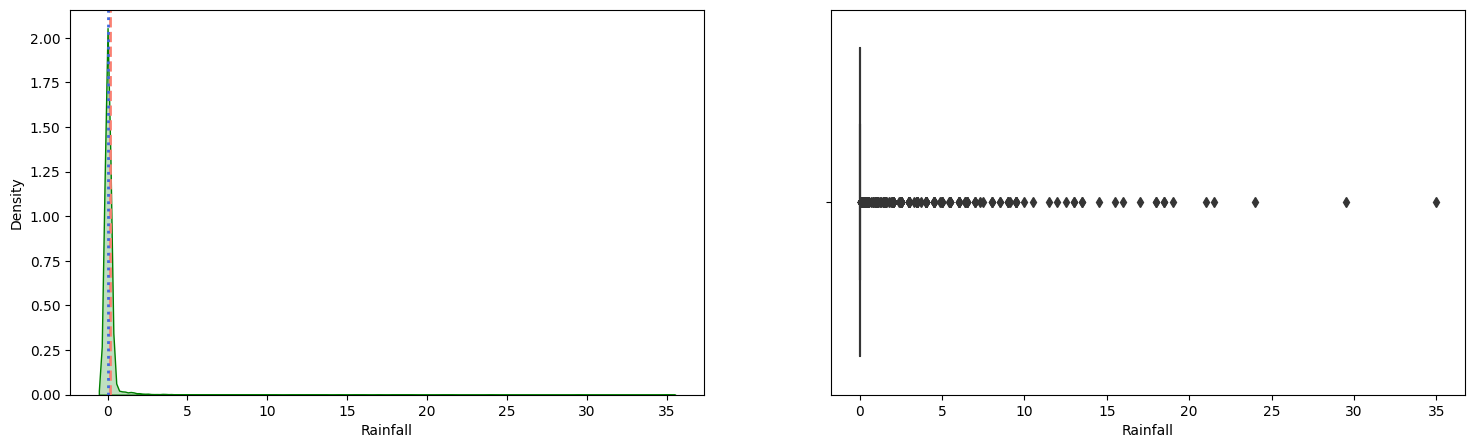

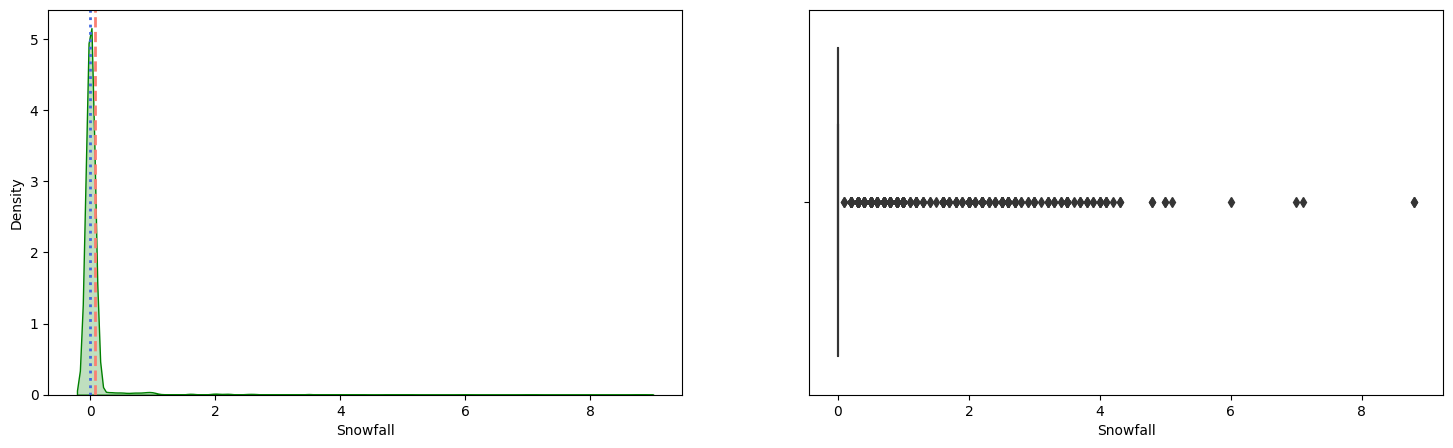

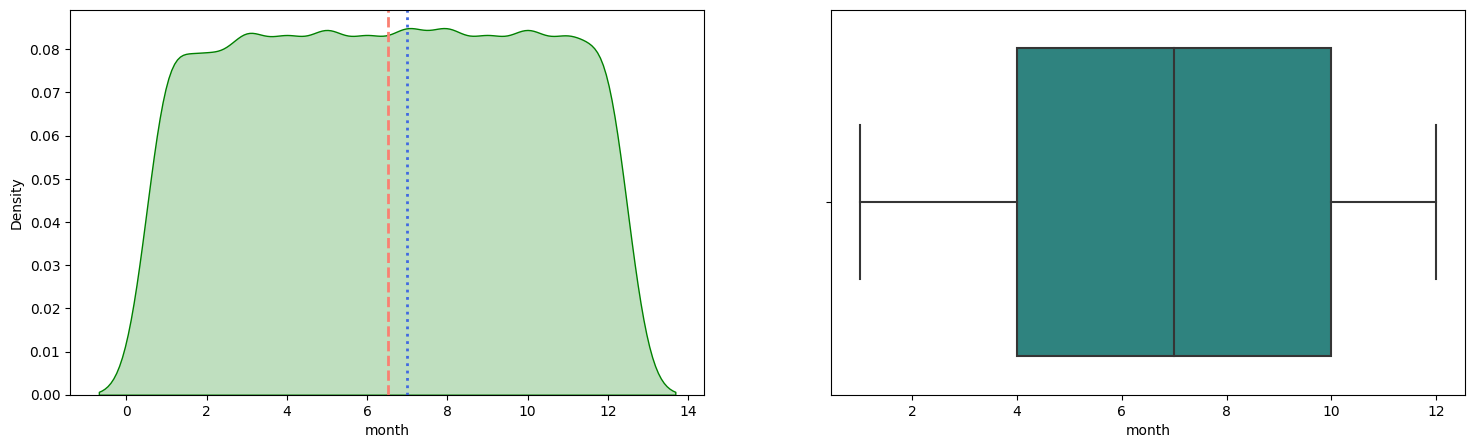

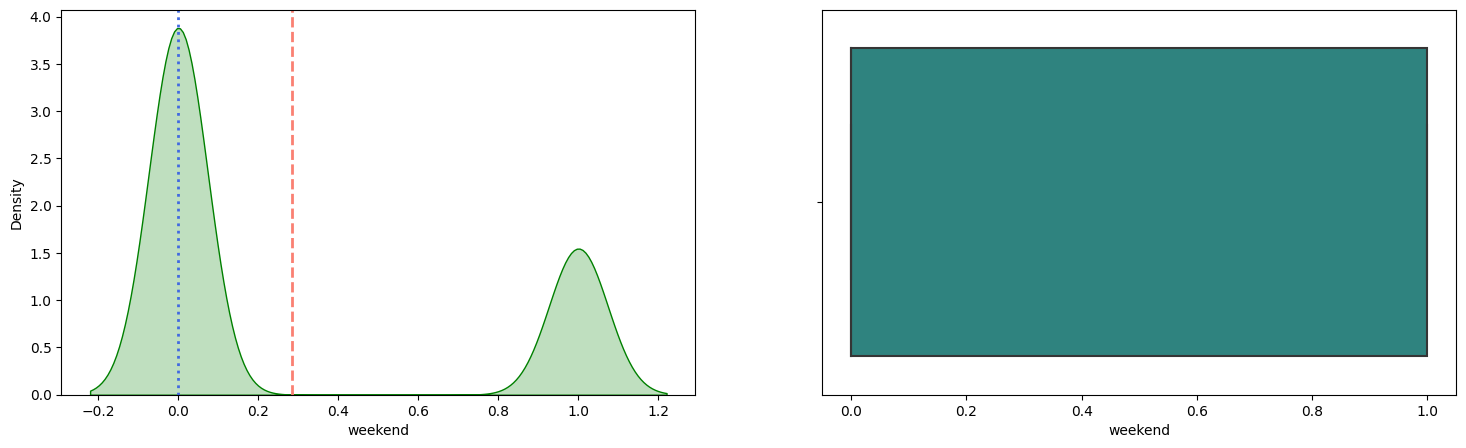

In [89]:
# Chart - 2 : Distribution of Numerical Features
for var in num_features:
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,5))
  sns.kdeplot(bike_df,x=var,fill=True,ax=ax1,color='g')
  ax1.axvline(bike_df[var].mean(),color='salmon', linestyle='dashed', linewidth=2)
  ax1.axvline(bike_df[var].median(),color='royalblue', linestyle=':', linewidth=2)
  sns.boxplot(bike_df,x=var,ax=ax2,palette="viridis")
  plt.show()
  print('\n\n')



#####  What is/are the insight(s) found from the chart?

####**Our numerical features exhibit skewness and some of them contains outliers.**

 #####  Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####**Yes, the gained insights from careful analysis and appropriate handling of skewness and outliers can help create a positive business impact. By accurately understanding and addressing these data characteristics, businesses can make informed decisions, develop effective strategies, and optimize their operations. This can lead to improved resource allocation, targeted marketing, enhanced customer satisfaction, and overall positive growth and performance in the business.**

#### Chart - 3

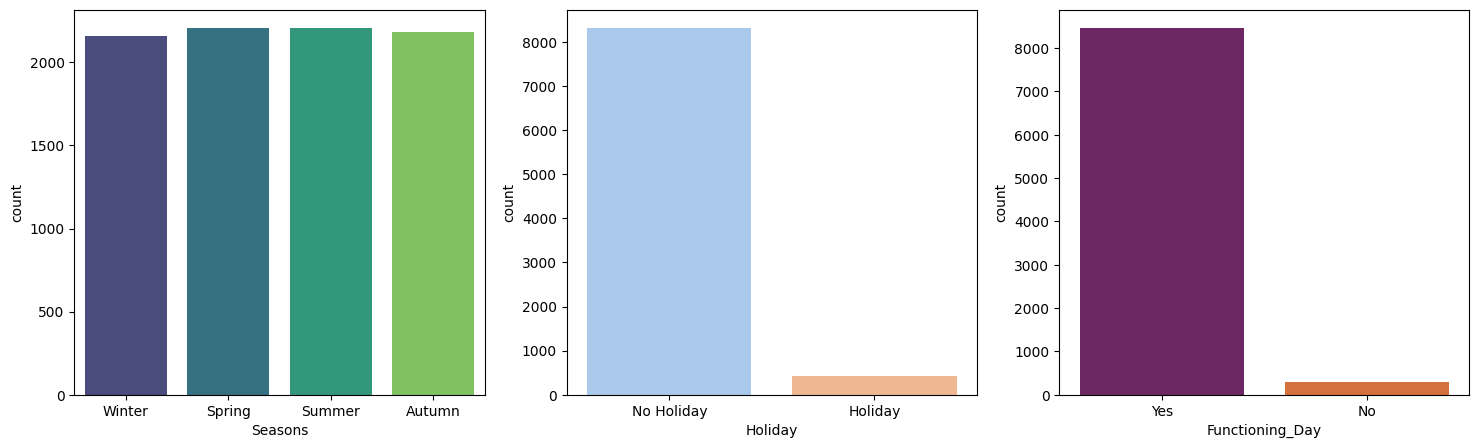

In [90]:
# Chart - 3 : Plotting graph for categorical features
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,5))
sns.countplot(bike_df,x='Seasons',ax=ax1,palette='viridis')
sns.countplot(bike_df,x='Holiday',ax=ax2,palette='pastel')
sns.countplot(bike_df,x='Functioning_Day',ax=ax3,palette='inferno')
plt.show()


#####  What is/are the insight(s) found from the chart?

#####**There is not much difference across seasons but the count of Rental bikes significantly imbalance across 'Holiday' and 'Functioning Day' columns.**

#####  Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#####**Analyzing the rental bike patterns across seasons, holidays, and functional days provides valuable insights for understanding the fluctuation in demand and optimizing resource allocation accordingly.**

## ***BIVARIATE ANALYSIS***

#### Chart - 4

In [91]:
num_features

Index(['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'month', 'weekend'],
      dtype='object')

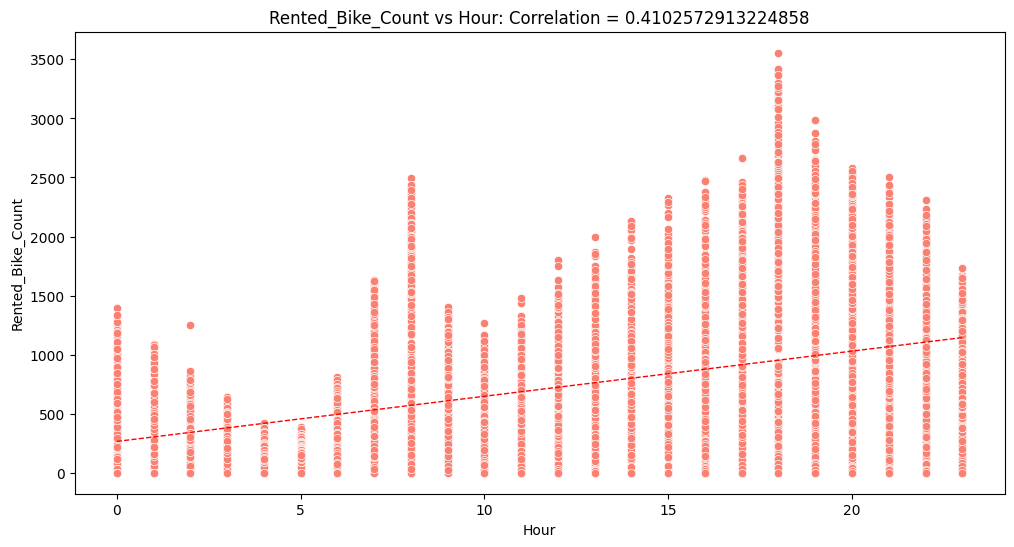

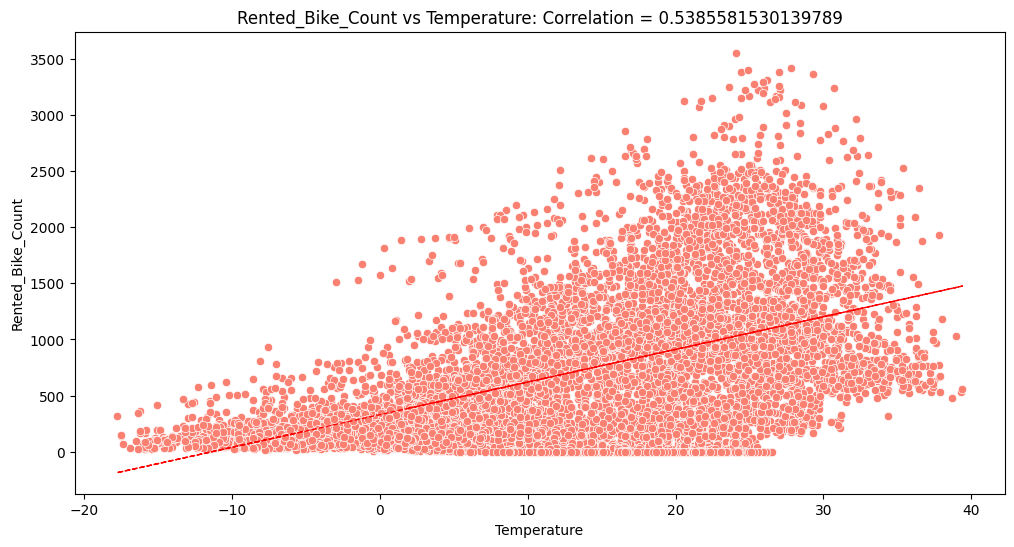

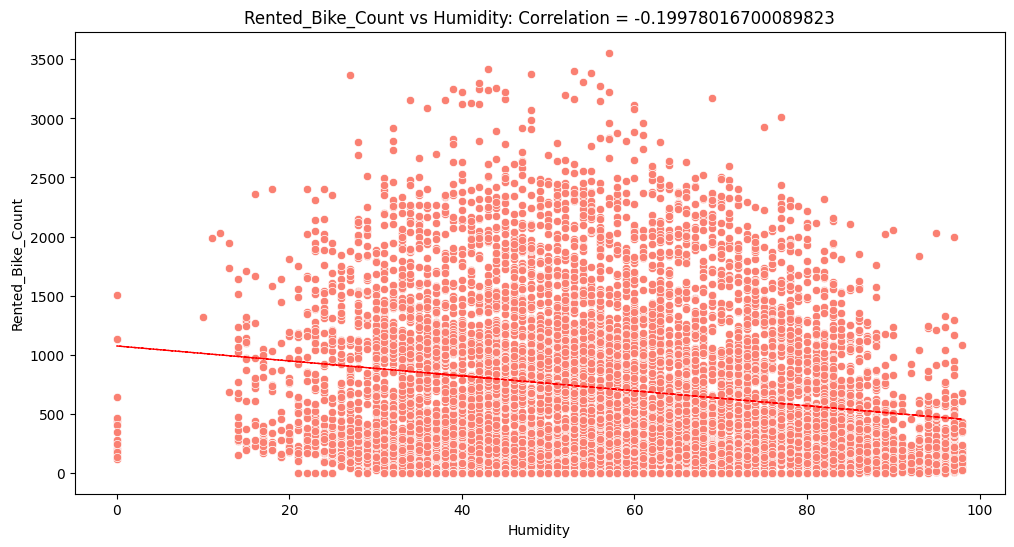

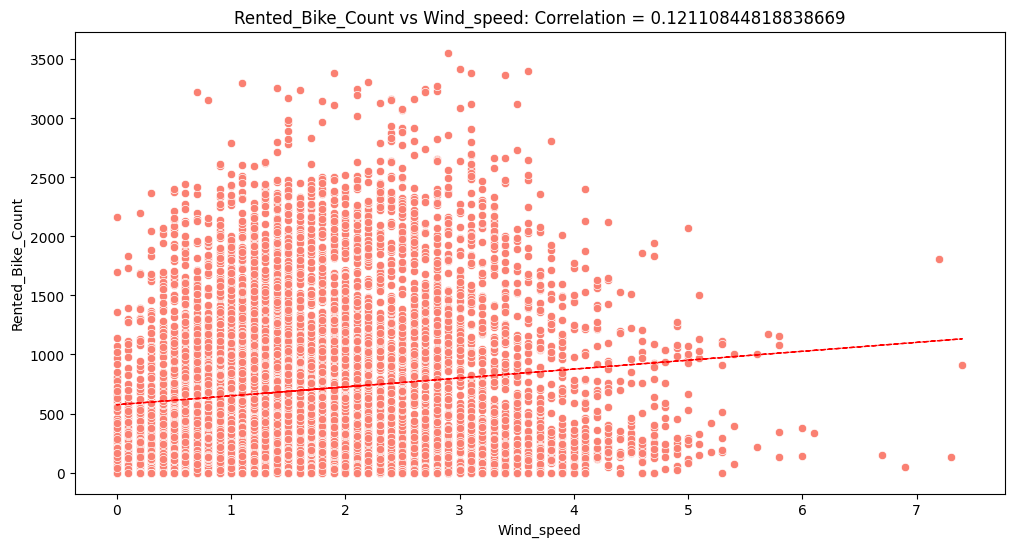

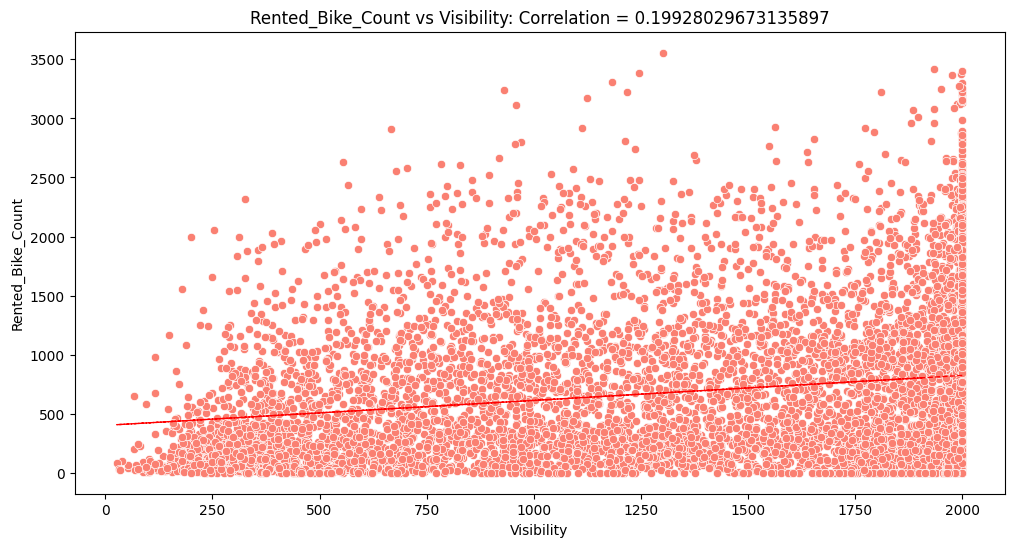

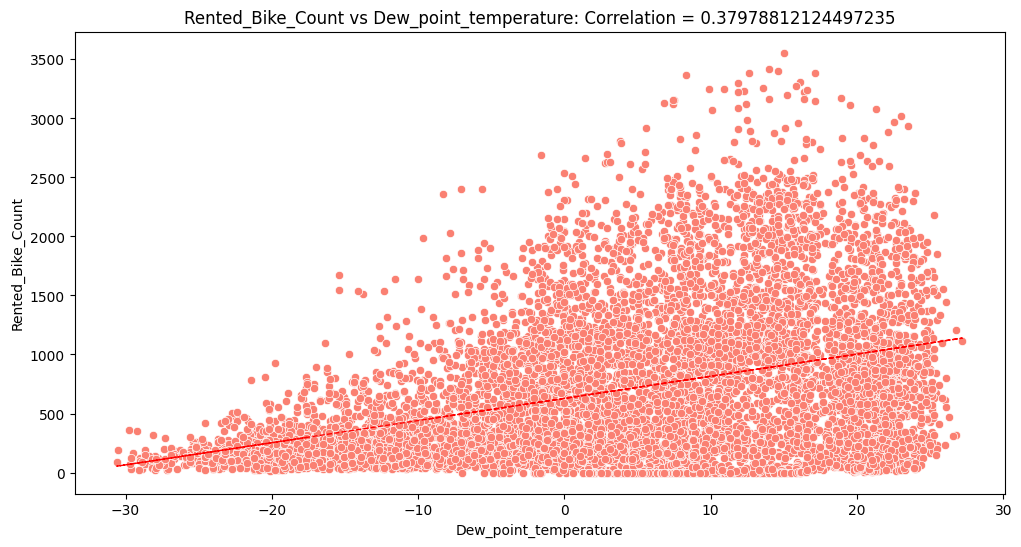

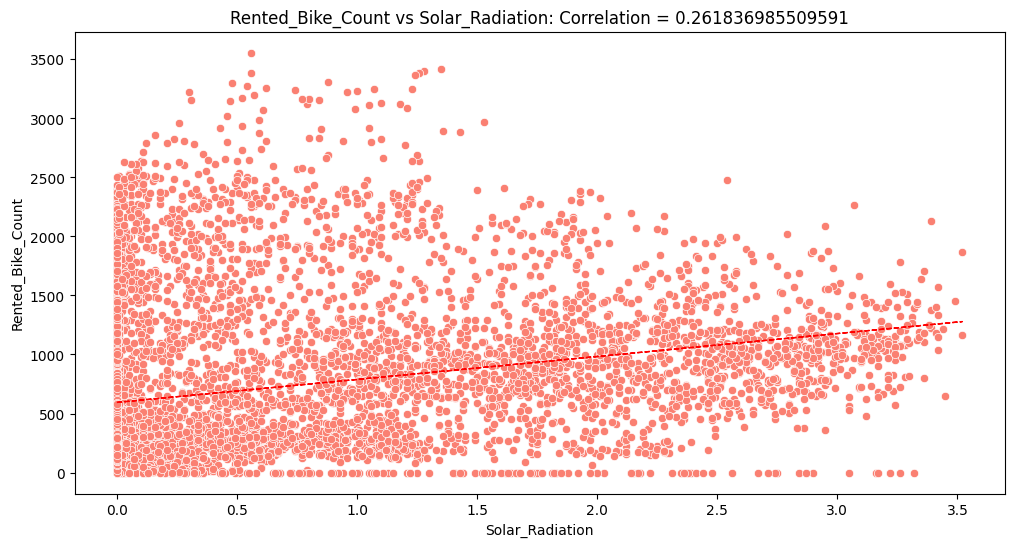

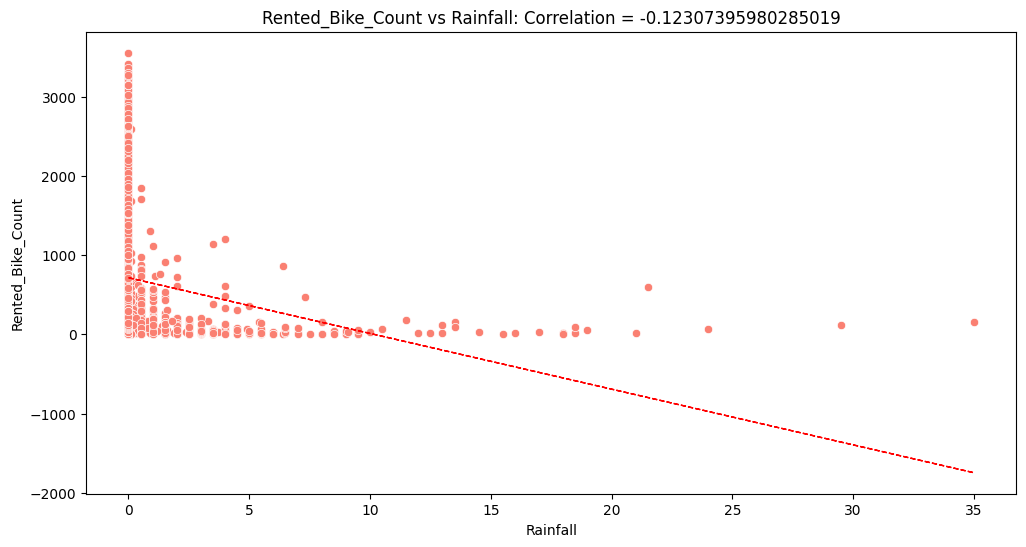

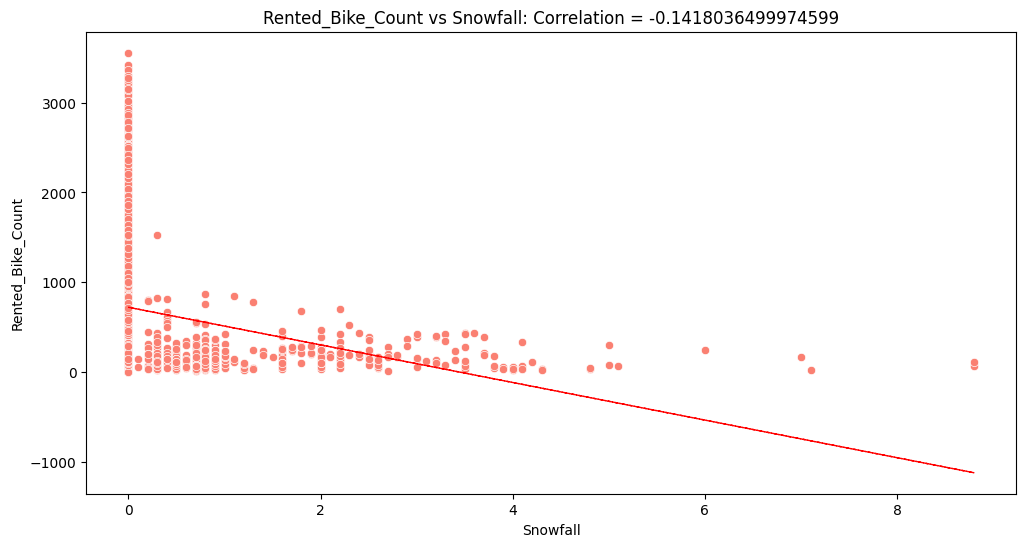

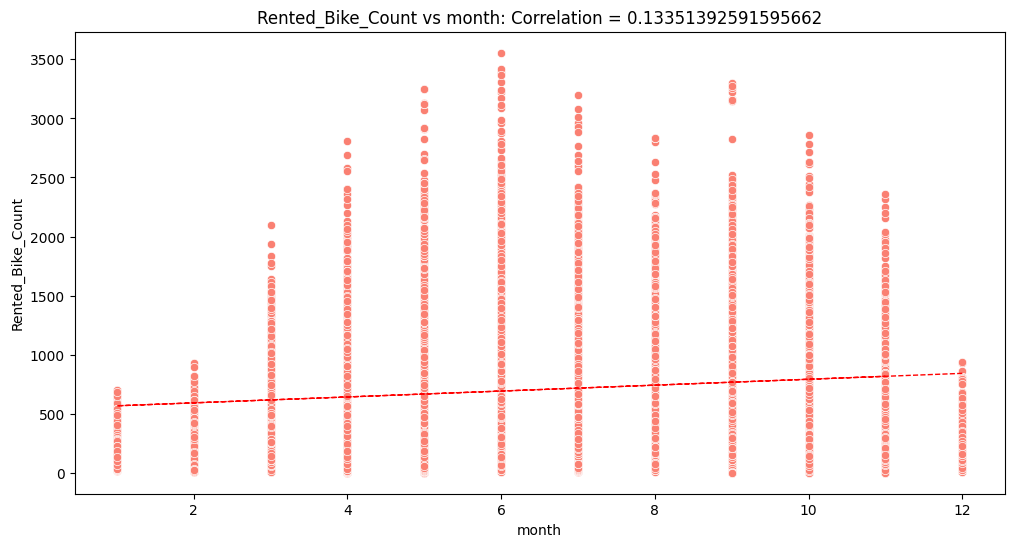

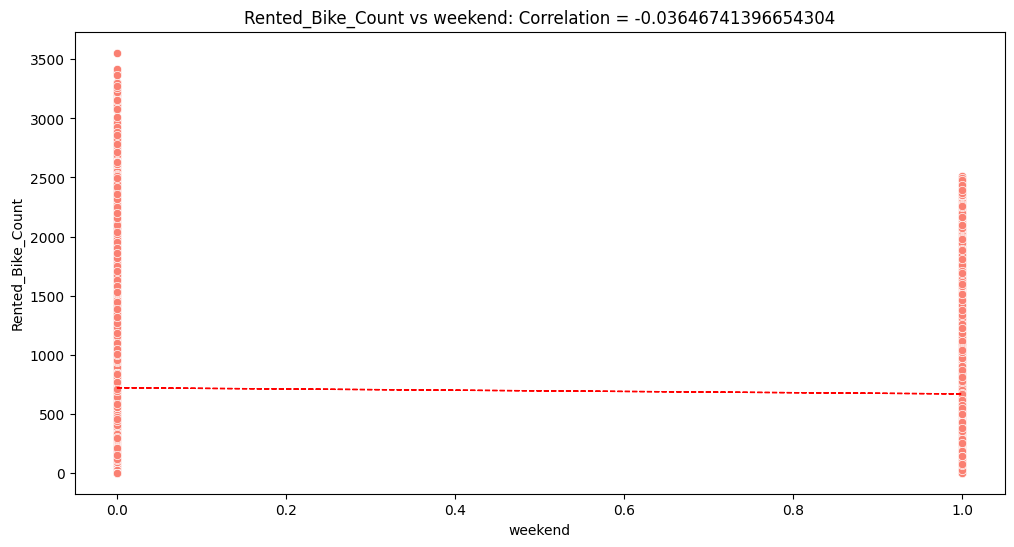

In [92]:
# Chart - 4 : Relation between  Numerical Features and dependent variable
for var in num_features:
  plt.figure(figsize=(12,6))
  sns.scatterplot(bike_df,x=var,y='Rented_Bike_Count',color='salmon')
  correlation=bike_df[var].corr(bike_df['Rented_Bike_Count'])
  plt.title('Rented_Bike_Count vs ' + var + ': Correlation = '+str(correlation) )
  z = np.polyfit(bike_df[var], bike_df['Rented_Bike_Count'], 1)
  y_hat = np.poly1d(z)(bike_df[var])
  plt.plot(bike_df[var], y_hat,'r--', lw=1)
  plt.show()
  print('\n\n\n')

 



##### 1. Why did you pick the specific chart?

#####**To  understand the  relationship  between numerical feature and dependent variable by plotting a regression line helps visualize and understand their association.**

##### 2. What is/are the insight(s) found from the chart?

#####**Hour, Temperature, wind speed, visibility, dew point temperature,solar radiation & month are positively correlated with our dependent variable (Rented Bike Count) while other numerical features are negatively correlated with Rented bike count.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#####**Yes, the gained insights indicating positive correlations between Hour, Temperature, wind speed, visibility, dew point temperature, solar radiation, and month with the Rented Bike Count can inform business decisions such as optimizing operational hours, adjusting pricing, and targeting marketing efforts to maximize bike rentals and drive positive business impact. Additionally, understanding the negative correlations with other numerical features can help identify areas for improvement and implement strategies to mitigate potential negative impacts on bike rentals.**

#### Chart - 5

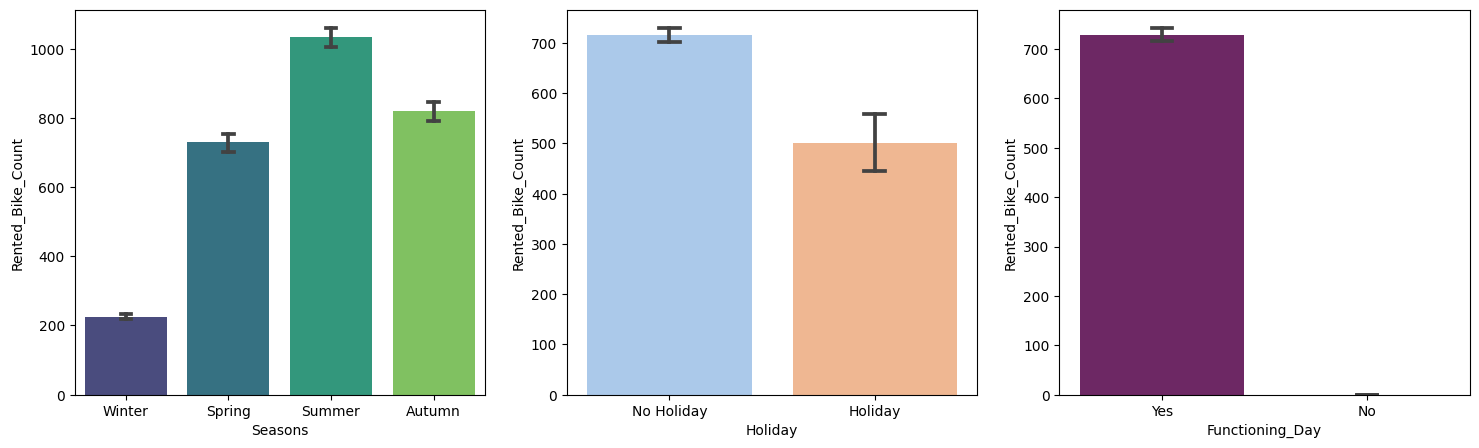

In [93]:
# Chart - 5: Relation between Categorical features and Dependent Variable
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,5))
sns.barplot(bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax1,palette='viridis',capsize=0.1)
sns.barplot(bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax2,palette='pastel',capsize=0.1)
sns.barplot(bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax3,palette='inferno',capsize=0.1)
plt.show()


##### 1. Why did you pick the specific chart?

#####**To plot the variation in Rented Bike count due to Seasons,Holiday and Functioning day**

##### 2. What is/are the insight(s) found from the chart?

* **Count is maximum during summer but minimum during winter.**
* **During holidays counts drop down**. 
* **Contribution of non-funtioning day to count is insignificant**. 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insights about the count being maximum during summer, dropping during winter, and decreasing during holidays can help businesses plan their resources, adjust marketing strategies, and optimize operations to meet customer demand, resulting in a positive business impact. Additionally, the understanding that non-functioning days have an insignificant contribution can guide businesses in allocating resources more efficiently.**

#### Chart - 6

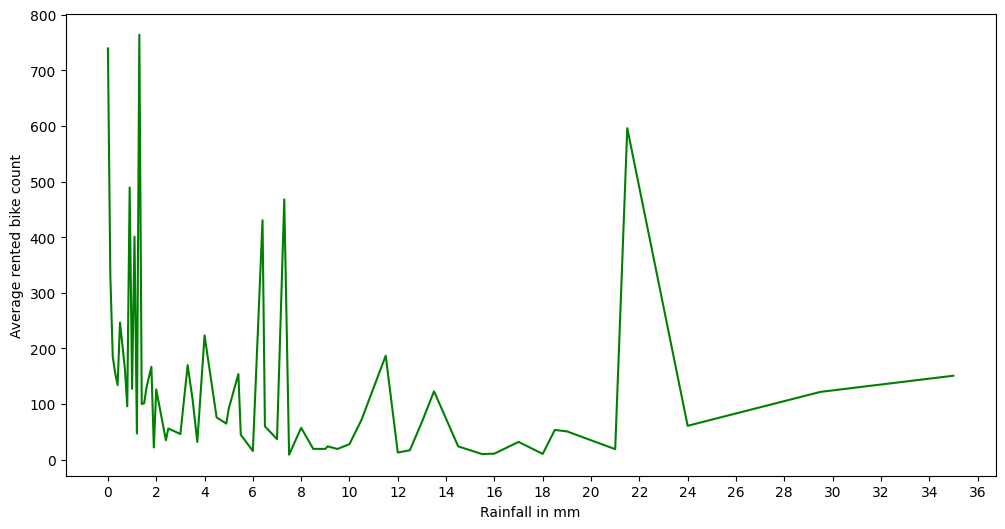

In [94]:
# Chart - 6: plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall"
plt.figure(figsize=(12,6))
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot(c='g')
plt.xlabel('Rainfall in mm')
plt.ylabel('Average rented bike count')
plt.xticks(range(0,37,2))
plt.show()

 #####  What is/are the insight(s) found from the chart?

**The above plot indicates that despite heavy rainfall, the demand for rented bikes does not decrease. For instance, even with a rainfall of 22-24 mm, there is a significant peak in the number of rented bikes.**

 #####  Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insight that heavy rainfall does not decrease the demand for rented bikes can have a positive business impact. Businesses can leverage this information to optimize their operations during rainy periods and ensure a continuous supply of bikes, meeting customer demand and potentially increasing revenue.**

#### Chart - 7

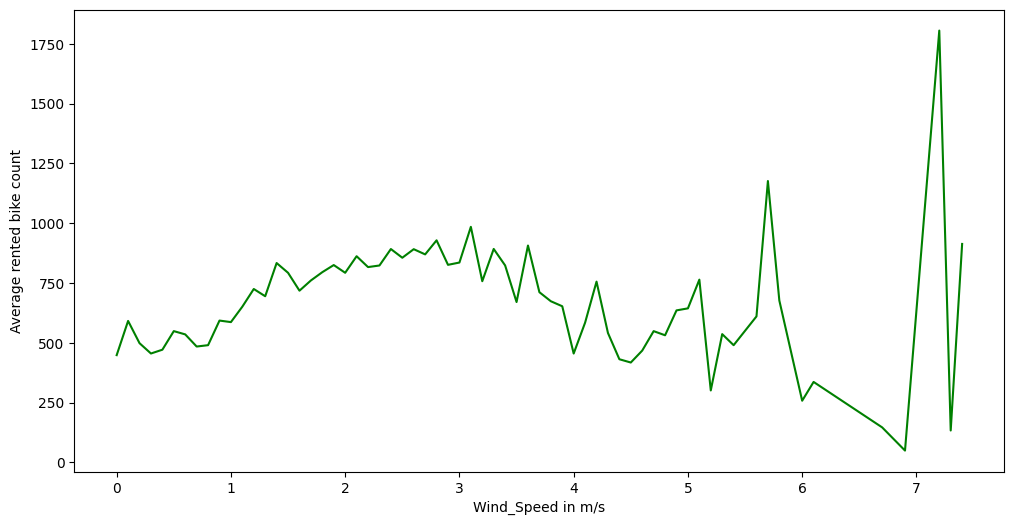

In [95]:
# Chart - 7 : plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
plt.figure(figsize=(12,6))
bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot(c='g')
plt.xlabel('Wind_Speed in m/s')
plt.ylabel('Average rented bike count')
plt.show()




#####  What is/are the insight(s) found from the chart?

**From the plot above, we can observe that the demand for rented bikes is evenly distributed regardless of the wind speed. However, there is a spike in bike rentals when the wind speed is at 7 m/s, indicating that people enjoy riding bikes when there is a slight breeze.**

#####  Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insight about the even distribution of bike rentals regardless of wind speed, with a spike at 7 m/s, can have a positive business impact. Businesses can promote biking as an enjoyable activity during breezy conditions, potentially increasing bike rentals and attracting more customers.**

#### Chart - 8

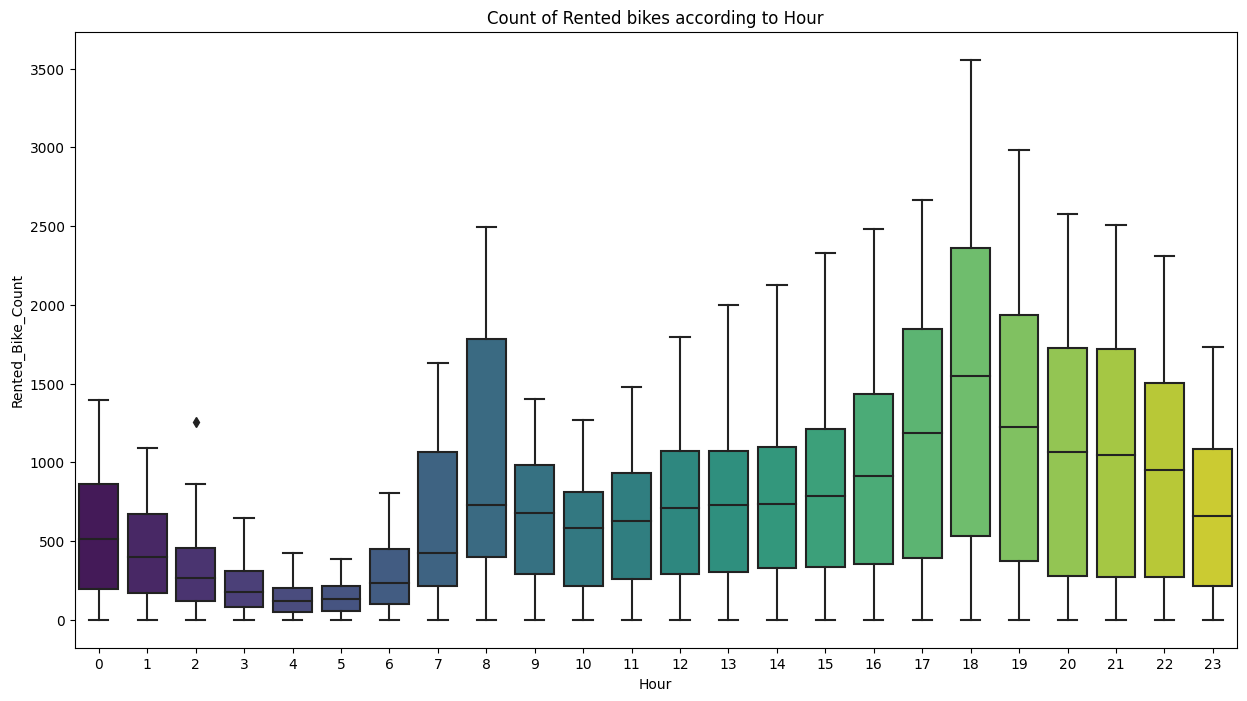

In [96]:
# Chart - 8 
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=bike_df, x='Hour', y='Rented_Bike_Count', ax=ax,palette='viridis')
ax.set(title='Count of Rented bikes according to Hour')
plt.show()

##### What is/are the insight(s) found from the chart?

**The plot above showcases the usage of rented bikes across different hours throughout the year. It is notable that people tend to use rented bikes during their working hours, specifically from 7 AM to 9 AM and 5 PM to 7 PM.**

#####  Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insight that people tend to use rented bikes during their working hours can have a positive business impact. Businesses can optimize their operations and marketing efforts during these peak hours to meet customer demand, attract more riders, and potentially increase revenue.**

#### Chart - 9

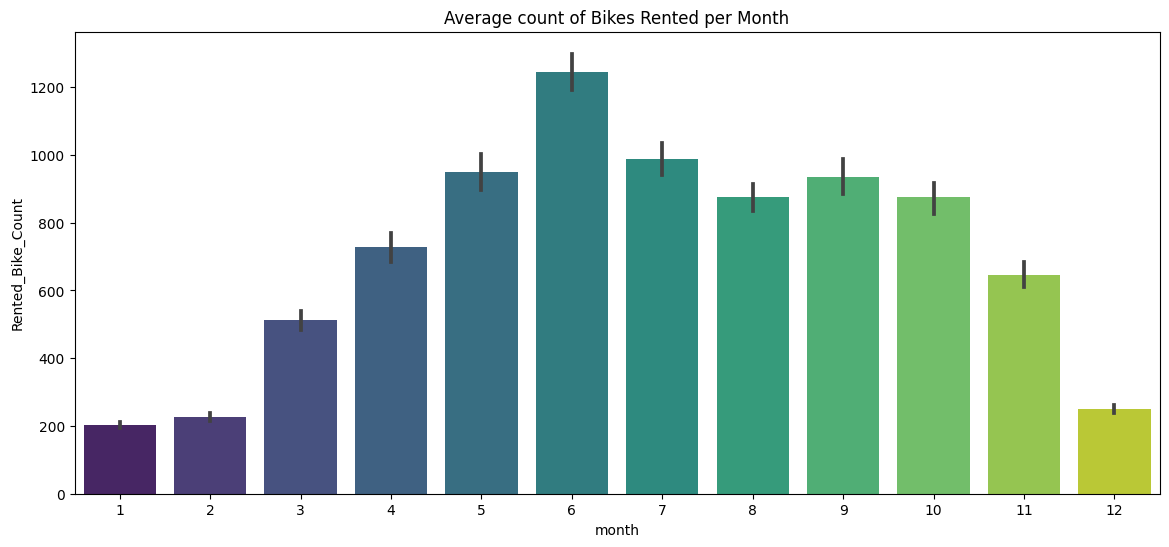

In [97]:
# Chart - 9 :  
plt.figure(figsize=(14,6))
sns.barplot(x='month',y='Rented_Bike_Count',data=bike_df,palette='viridis')
plt.title('Average count of Bikes Rented per Month')
plt.show()

#####  What is/are the insight(s) found from the chart?

**During Summer season the demand for rented bikes are on hike while during winter demand is low.**

#####  Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insight that demand for rented bikes is high during summer and low during winter can help businesses align their resources and marketing strategies accordingly, maximizing revenue and creating a positive business impact.**

## ***TriVariate Analysis***

#### Chart - 10

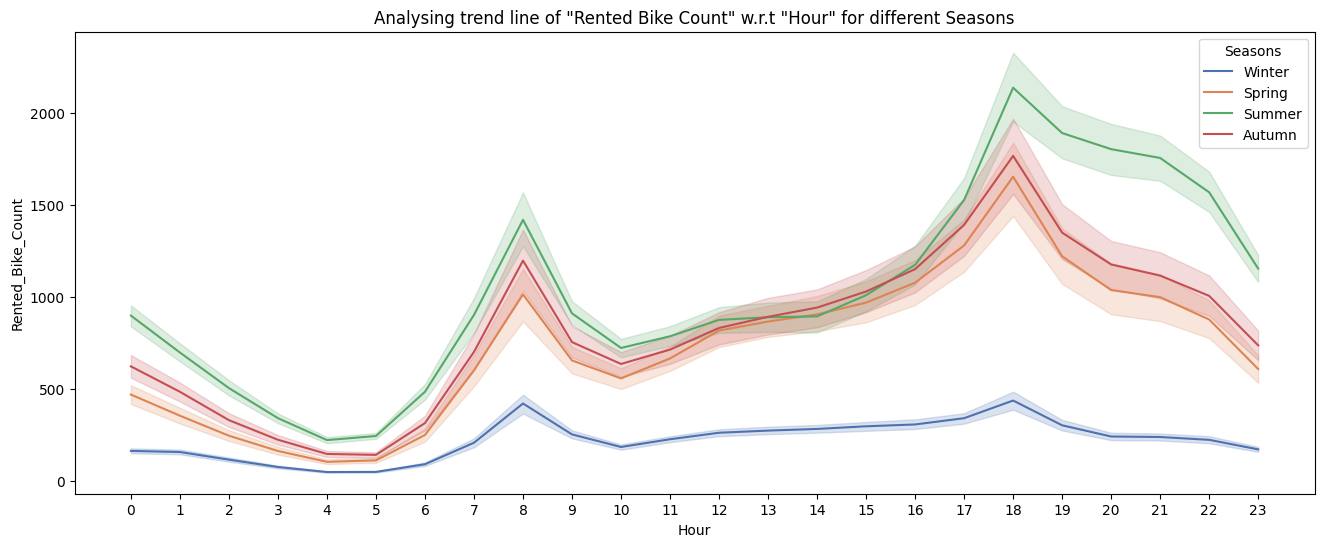

In [98]:
# Chart - 10 : 
plt.figure(figsize=(16,6))
sns.lineplot(x='Hour',y= "Rented_Bike_Count",data=bike_df,hue='Seasons',palette='deep',alpha=1)
plt.xticks(range(0,24))
plt.title('Analysing trend line of "Rented Bike Count" w.r.t "Hour" for different Seasons')
plt.show()

#####  What is/are the insight(s) found from the chart?

 **The analysis reveals that the use of rented bikes is significantly high during the summer season with peak demand during 7am-9am and 5pm-7pm. However, during the winter season, the use of rented bikes is quite low due to snowfall.**

#####  Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insights that highlight high demand for rented bikes during the summer season and specific peak hours, as well as low demand during the winter season due to snowfall, can help businesses optimize operations, target marketing efforts, and adjust resources accordingly, leading to a positive business impact.**

#### Chart - 11

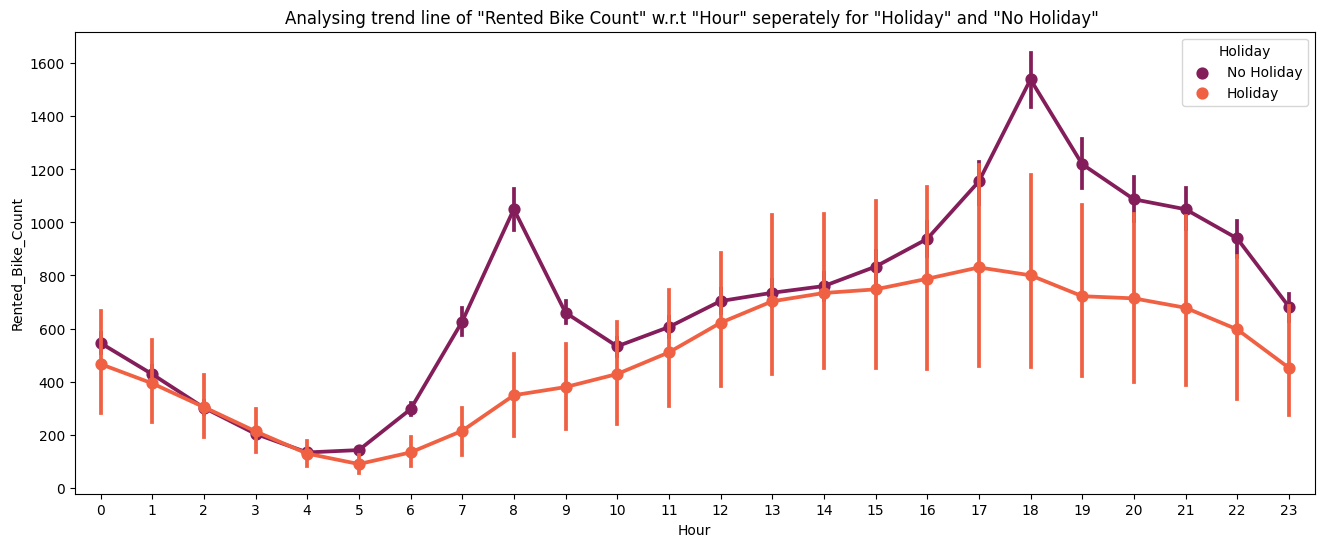

In [99]:
# Chart - 11 :  
plt.figure(figsize=(16,6))
sns.pointplot(x='Hour',y= "Rented_Bike_Count",data=bike_df,hue='Holiday',palette='rocket')
plt.title('Analysing trend line of "Rented Bike Count" w.r.t "Hour" seperately for "Holiday" and "No Holiday" ')
plt.show()

##### What is/are the insight(s) found from the chart?

**During Holidays People prefer to use rented bikes after 12 pm.**

#####  Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insight that people prefer to use rented bikes after 12 pm during holidays can help businesses adjust their operational hours and allocate resources effectively, catering to the increased demand and potentially creating a positive business impact.**

#### Chart - 12

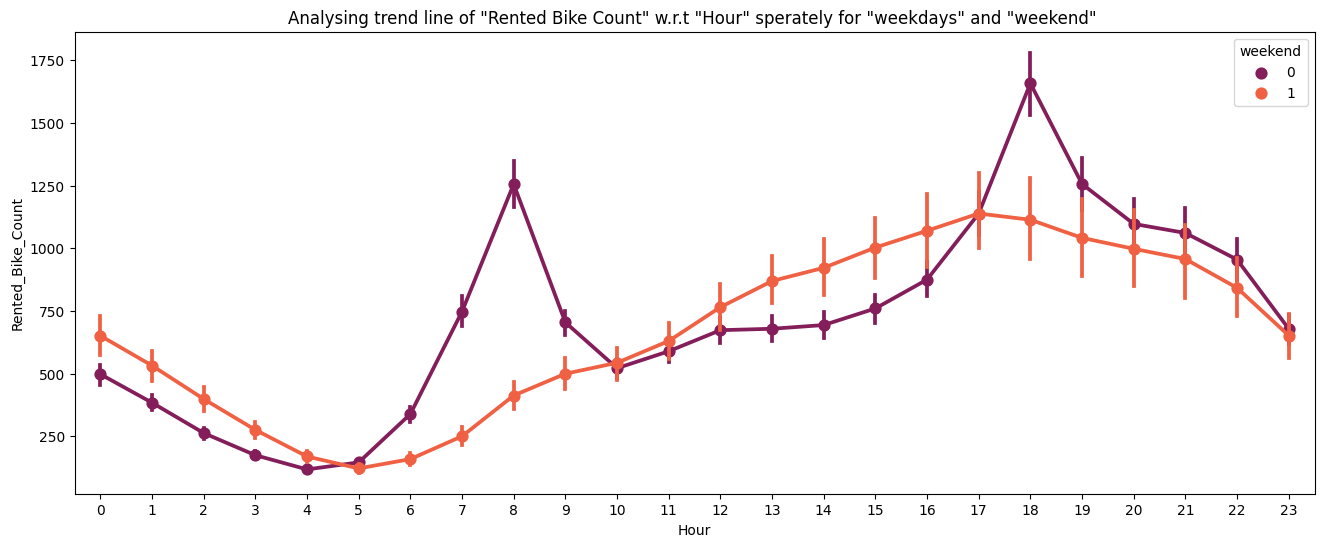

In [100]:
# Chart - 12 
plt.figure(figsize=(16,6))
sns.pointplot(x='Hour',y= "Rented_Bike_Count",data=bike_df,hue='weekend',palette='rocket')
plt.title('Analysing trend line of "Rented Bike Count" w.r.t "Hour" sperately for "weekdays" and "weekend" ')
plt.show()

#####  What is/are the insight(s) found from the chart?

* **we can observe that the demand for rented bikes is higher on weekdays and more specifically between 7am-9am and 5pm-7pm**.
* **On weekends,the demand for rented bikes is generally lower, especially during the morning hours but rise thereafter.**

#####  Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insights about higher demand for rented bikes on weekdays, specifically during peak commuting hours, and lower demand on weekends, especially in the morning, can help businesses optimize their operations, staffing, and marketing strategies to cater to these patterns, potentially leading to a positive business impact**

### **Multivariate Analysis**

#### Chart - 13 - Correlation Heatmap

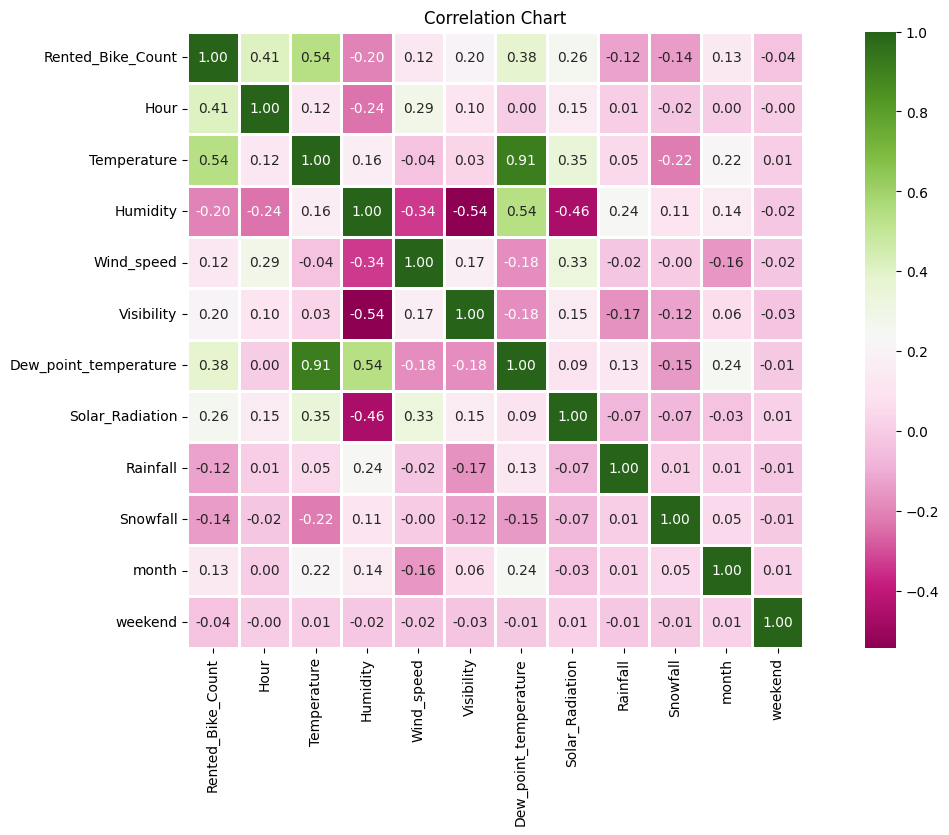

In [101]:
plt.figure(figsize=(16,8))
plt.title('Correlation Chart')
sns.heatmap(bike_df[bike_df.describe().columns].corr(),annot=True,annot_kws={'size': 10},linewidths=2,square=True,fmt='.2f',cmap='PiYG')
plt.show()

### **Presence of Multicollinearity**
* **We observe that columns 'Temperature' and 'Dew point temperature' are highly positively correlated, with a correlation coefficient of 0.91.**
* **'Visibility' and 'Humidity' have high negative correlation as compared to others, with a correlation coefficient of -0.54.**

### **Using VIF to remove Multicollinearity**
* VIF score should be less than 5 for no multicollinearity.

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

# Calculating VIF
  vif =pd.DataFrame()
  vif['Features']= X.columns
  vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return vif


In [103]:
bike_df_copy=bike_df.copy()

In [104]:
calc_vif(bike_df_copy[[i for i in bike_df_copy.describe().columns if i not in ["Rented_Bike_Count"]]])

,Features,VIF
0,Hour,4.425348
1,Temperature,34.919399
2,Humidity,7.003058
3,Wind_speed,4.881602
4,Visibility,9.378738
5,Dew_point_temperature,17.802987
6,Solar_Radiation,2.882967
7,Rainfall,1.082184
8,Snowfall,1.131902
9,month,5.094506


In [105]:
bike_df_copy.drop(columns = ['Dew_point_temperature'],axis = 1, inplace = True)

In [106]:
calc_vif(bike_df_copy[[i for i in bike_df_copy.describe().columns if i not in ["Rented Bike Count"]]])

,Features,VIF
0,Rented_Bike_Count,4.108312
1,Hour,4.695247
2,Temperature,4.487960
3,Humidity,6.410393
4,Wind_speed,4.661397
5,Visibility,5.458484
6,Solar_Radiation,2.269775
7,Rainfall,1.104438
8,Snowfall,1.131138
9,month,5.035427


In [107]:
bike_df_copy.drop(columns = ['Humidity'],axis = 1, inplace = True)

In [108]:
calc_vif(bike_df_copy[[i for i in bike_df_copy.describe().columns if i not in ["Rented Bike Count"]]])

,Features,VIF
0,Rented_Bike_Count,3.944904
1,Hour,4.577544
2,Temperature,3.665003
3,Wind_speed,4.281757
4,Visibility,5.344758
5,Solar_Radiation,1.912766
6,Rainfall,1.082502
7,Snowfall,1.095872
8,month,4.083921
9,weekend,1.360905


* let's ignore the VIF of Visibility

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [109]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [110]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [111]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

###  Handling Outliers

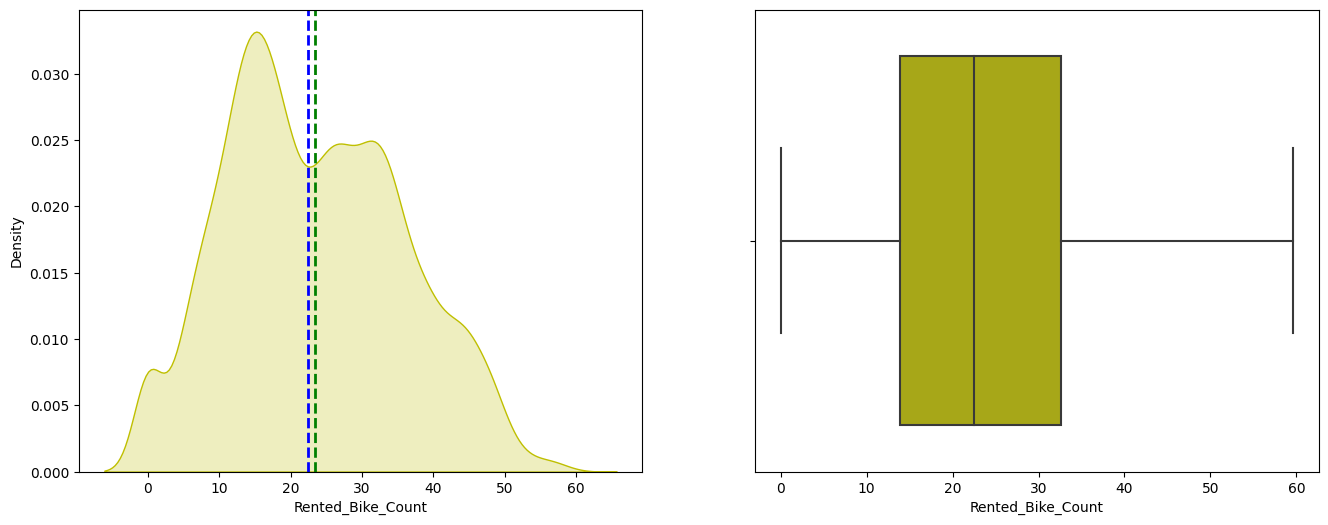

In [112]:
# Treatment of Outliers in our dependent Variable(applying square root transformation)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))
sns.kdeplot(np.sqrt(bike_df_copy['Rented_Bike_Count']),color='y',fill=True,ax=ax1)
ax1.axvline(np.sqrt(bike_df_copy['Rented_Bike_Count']).mean(), color='green', linestyle='dashed', linewidth=2)
ax1.axvline(np.sqrt(bike_df_copy['Rented_Bike_Count']).median(), color='blue', linestyle='dashed', linewidth=2)
sns.boxplot(x= np.sqrt(bike_df_copy['Rented_Bike_Count']),color='y')
plt.show()

#  Categorical Encoding

In [113]:
#ONE HOT ENCODING
cat_features=['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekend']
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data


**One-hot encoding enables a more descriptive representation of categorical data.Since many machine learning algorithms do not accept categorical data as input, the categories need to be converted into numerical values.**

In [114]:
for col in cat_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()   

,Rented_Bike_Count,Temperature,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekend_1
0,254,-5.2,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [115]:
bike_df_copy.columns

Index(['Rented_Bike_Count', 'Temperature', 'Wind_speed', 'Visibility',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning_Day_Yes', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekend_1'],
      dtype='object')

###  Data Scaling

In [116]:
# Scaling your data
features = list(set(bike_df_copy.columns) - {'Rented_Bike_Count'})
from scipy.stats import zscore
bike_df_copy[features]=bike_df_copy[features].apply(zscore)

## ***7. ML Model Implementation***

In [117]:
X=bike_df_copy.drop('Rented_Bike_Count',axis=1)
y=np.sqrt(bike_df_copy['Rented_Bike_Count'])

In [118]:
# TRAIN TEST SPLIT
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=19)
print(X_train.shape)
print(X_test.shape)

(6570, 46)
(2190, 46)


### **Linear Regression**

In [119]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [120]:
#check the score
lr.score(X_train,y_train)

0.7636010810913401

In [123]:
#check the coefficient
lr.coef_

array([ 6.57232179e+00, -8.55358692e-02,  1.95896508e+00,  1.66187339e+00,
       -1.86230157e+00, -2.94619284e-01, -4.34990197e-01, -9.77523805e-01,
       -1.51442565e+00, -1.93169644e+00, -1.86277366e+00, -9.16218096e-01,
        3.47190765e-01,  1.53802177e+00,  2.37802407e-01, -6.23052347e-01,
       -6.21938276e-01, -5.16902841e-01, -4.91655506e-01, -5.03119172e-01,
       -2.10801897e-01,  1.70498148e-01,  9.84618796e-01,  2.12810796e+00,
        1.52173549e+00,  1.32311655e+00,  1.36117072e+00,  1.11094617e+00,
        3.46455176e-01,  2.89104073e+12,  5.03466055e+12,  4.92627350e+12,
        6.40154845e-01,  5.22553575e+00, -3.03435469e-01,  1.33005237e+12,
        1.31038132e+12,  1.33005237e+12, -4.56057821e+10, -4.62904025e+10,
       -4.62904025e+10,  3.13916359e+12,  3.18628778e+12,  3.13916359e+12,
        3.24606938e-01, -6.43277789e-01])

In [124]:
# Prediction
y_pred_train= lr.predict(X_train)
y_pred_test= lr.predict(X_test)

In [130]:
# Calculate: Traing Set
# 1. mean_squared_error
mse_lr= mean_squared_error(y_train,y_pred_train)
print('MSE :' , mse_lr)
#2. Root_mean_squared_error
rmse_lr=np.sqrt(mse_lr)
print('RMSE :' , rmse_lr)
#3. mean_absolute_error
mae_lr=mean_absolute_error(y_train,y_pred_train)
print('MAE :' ,mae_lr)
#4. coefficient of determination(r2_score)
r2_lr=r2_score(y_train,y_pred_train)
print('R2 :' ,r2_lr)
#5. adjusted  coefficient of determination
adjusted_r2_lr=(1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_lr)

MSE : 36.49203034245854
RMSE : 6.040863377238269
MAE : 4.5530372039095175
R2 : 0.7636010810913401
Adjusted R2 : 0.7619340030183984


In [133]:
#Storing
lr_dict={'Model':'Linear Regression','MAE':round(mae_lr,2),'MSE':round(mse_lr,2),'RMSE':round(rmse_lr,2),'R2_score':round(r2_lr,2),'Adjusted R2_score':round(adjusted_r2_lr,2)}
training_df=pd.DataFrame(lr_dict,index=[1])
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Linear Regression,4.55,36.49,6.04,0.76,0.76


In [134]:
# Calculate: Test Set
# 1. mean_squared_error
mse_lr= mean_squared_error(y_test,y_pred_test)
print('MSE :' , mse_lr)
#2. Root_mean_squared_error
rmse_lr=np.sqrt(mse_lr)
print('RMSE :' , rmse_lr)
#3. mean_absolute_error
mae_lr=mean_absolute_error(y_test,y_pred_test)
print('MAE :' ,mae_lr)
#4. coefficient of determination(r2_score)
r2_lr=r2_score(y_test,y_pred_test)
print('R2 :' ,r2_lr)
#5. adjusted  coefficient of determination
adjusted_r2_lr=(1-(1-r2_score(y_test,y_pred_test))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_lr)

MSE : 37.49179310670906
RMSE : 6.123054230260341
MAE : 4.561515511373977
R2 : 0.7610446781067197
Adjusted R2 : 0.7593595723567441


### **Concluding Remark:**

* The linear regression model shows moderate performance on both the training and test sets. 
* The model achieves an R-squared (R2) value of approximately 0.76, indicating that around 76% of the variance in the target variable is explained by the independent variables. 
* The mean squared error (MSE) values are 36.49 (training set) and 37.49 (test set), suggesting moderate errors in the predictions. 
* The root mean squared error (RMSE) values are around 6.04 and 6.12, indicating the average magnitude of the errors. 
* The mean absolute error (MAE) values are approximately 4.55 and 4.56, representing the average absolute deviation of the predictions. 
* The adjusted R-squared values account for the number of predictors in the model, showing a similar pattern. 
* Overall, further analysis and model refinement may be beneficial to improve the performance.

In [136]:
#Storing
lr_dict2={'Model':'Linear Regression','MAE':round(mae_lr,2),'MSE':round(mse_lr,2),'RMSE':round(rmse_lr,2),'R2_score':round(r2_lr,2),'Adjusted R2_score':round(adjusted_r2_lr,2)}
test_df=pd.DataFrame(lr_dict2,index=[1])
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Linear Regression,4.56,37.49,6.12,0.76,0.76


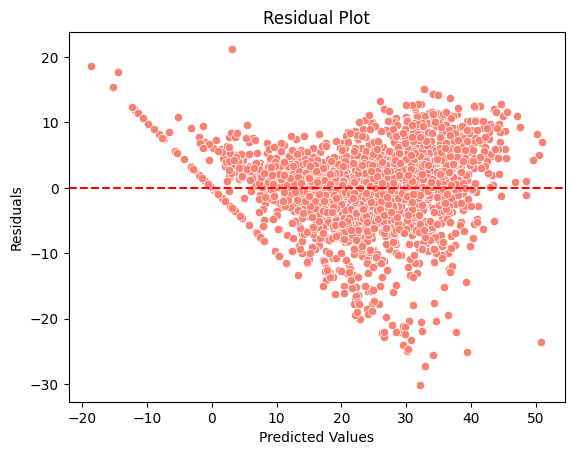

In [142]:
# Checking Heteroscedasticity
residuals = y_test - y_pred_test
sns.scatterplot(x=y_pred_test, y=residuals,color='salmon')

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')


plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.show()


* **Since,the  points in the scatter plot are more or less evenly distributed on both sides of the line y=0, it suggests that the residuals have relatively consistent variability across the range of predicted values. This indicates homoscedasticity rather than heteroscedasticity**. 

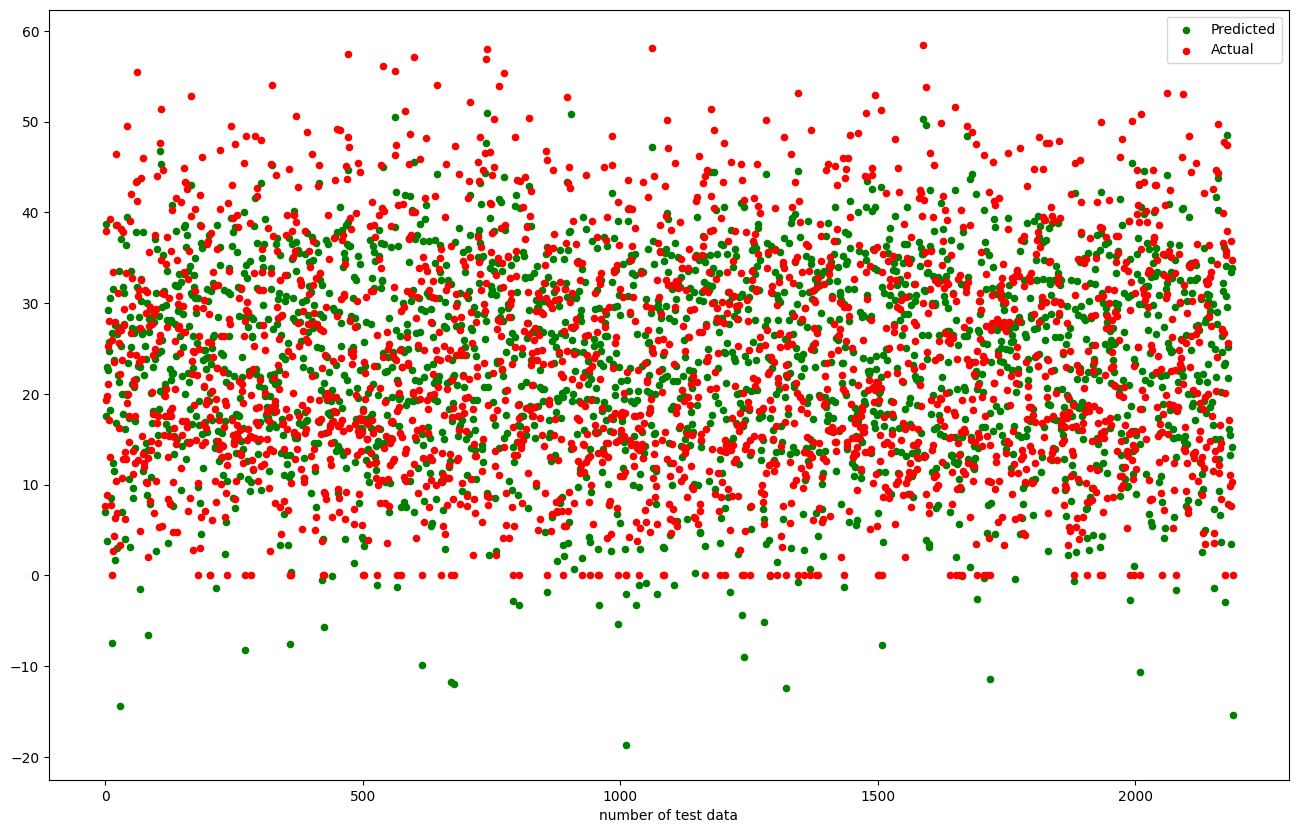

In [145]:
plt.figure(figsize=(16,10))
plt.scatter(range(len(y_pred_test)),y_pred_test,s=20,c='green',label='Predicted')
plt.scatter(range(len(y_test)), y_test, s=20, c='red', label='Actual')
plt.legend()
plt.xlabel('number of test data')
plt.show()


### **Lasso Regression(L1 Regularization)**

In [146]:
lasso = Lasso(alpha=0.1,max_iter=3500)
lasso.fit(X_train,y_train)


Lasso(alpha=0.1, max_iter=3500)

In [147]:
#check the score
lasso.score(X_train,y_train)

0.7601251825757874

In [149]:
# Prediction
y_pred_train_lasso= lasso.predict(X_train)
y_pred_test_lasso= lasso.predict(X_test)

In [150]:
# Calculate: Traing Set
# 1. mean_squared_error
mse_lasso= mean_squared_error(y_train,y_pred_train_lasso)
print('MSE :' , mse_lasso)
#2. Root_mean_squared_error
rmse_lasso=np.sqrt(mse_lasso)
print('RMSE :' , rmse_lasso)
#3. mean_absolute_error
mae_lasso=mean_absolute_error(y_train,y_pred_train_lasso)
print('MAE :' ,mae_lasso)
#4. coefficient of determination(r2_score)
r2_lasso=r2_score(y_train,y_pred_train_lasso)
print('R2 :' ,r2_lasso)
#5. adjusted  coefficient of determination
adjusted_r2_lasso=(1-(1-r2_score(y_train,y_pred_train_lasso))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_lasso)

MSE : 37.02859199291965
RMSE : 6.085112323771818
MAE : 4.571329774881155
R2 : 0.7601251825757874
Adjusted R2 : 0.7584335925709562


In [151]:
#Storing
lasso_dict={'Model':'Lasso Regression','MAE':round(mae_lasso,2),'MSE':round(mse_lasso,2),'RMSE':round(rmse_lasso,2),'R2_score':round(r2_lasso,2),'Adjusted R2_score':round(adjusted_r2_lasso,2)}
training_df=training_df.append(lasso_dict,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
0,Linear Regression,4.55,36.49,6.04,0.76,0.76
1,Lasso Regression,4.57,37.03,6.09,0.76,0.76


In [152]:
# Calculate: Test  Set
# 1. mean_squared_error
mse_lasso= mean_squared_error(y_test,y_pred_test_lasso)
print('MSE :' , mse_lasso)
#2. Root_mean_squared_error
rmse_lasso=np.sqrt(mse_lasso)
print('RMSE :' , rmse_lasso)
#3. mean_absolute_error
mae_lasso=mean_absolute_error(y_test,y_pred_test_lasso)
print('MAE :' ,mae_lasso)
#4. coefficient of determination(r2_score)
r2_lasso=r2_score(y_test,y_pred_test_lasso)
print('R2 :' ,r2_lasso)
#5. adjusted  coefficient of determination
adjusted_r2_lasso=(1-(1-r2_score(y_test,y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_lasso)

MSE : 38.59870286591022
RMSE : 6.212785435367152
MAE : 4.619906183995424
R2 : 0.7539897480567245
Adjusted R2 : 0.7487090800262108


In [153]:
#Storing
lasso_dict2={'Model':'Lasso Regression','MAE':round(mae_lasso,2),'MSE':round(mse_lasso,2),'RMSE':round(rmse_lasso,2),'R2_score':round(r2_lasso,2),'Adjusted R2_score':round(adjusted_r2_lasso,2)}
test_df=test_df.append(lasso_dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
0,Linear Regression,4.56,37.49,6.12,0.76,0.76
1,Lasso Regression,4.62,38.60,6.21,0.75,0.75


###**Ridge Regression(L2 Regularization)**

In [154]:
ridge=Ridge(alpha=0.1)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [121]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [122]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***